In [2]:
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
from random import randint

In [3]:
data = pd.read_csv('./label8.csv', header=None, names=['id1', 'id2', 'A',' B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'])
data

,id1,id2,A,B,C,D,E,F,G,H,I,J
0,TRAIN_09454,TRAIN_11615,1,1,1,0,1,1,1,0,1,1
1,TRAIN_09334,TRAIN_21957,1,1,0,1,0,1,1,1,1,1
2,TRAIN_27290,TRAIN_08446,1,1,1,0,1,1,0,1,1,1
3,TRAIN_28999,TRAIN_11615,1,1,1,0,1,1,1,0,1,1
4,TRAIN_29023,TRAIN_19749,1,1,1,1,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,TRAIN_31932,TRAIN_32444,1,0,0,1,1,1,1,1,1,1
996,TRAIN_13633,TRAIN_14689,1,1,1,0,1,1,0,1,1,1
997,TRAIN_29240,TRAIN_16774,1,1,1,0,0,1,1,1,1,1
998,TRAIN_32044,TRAIN_19533,1,1,1,1,1,0,0,1,1,1


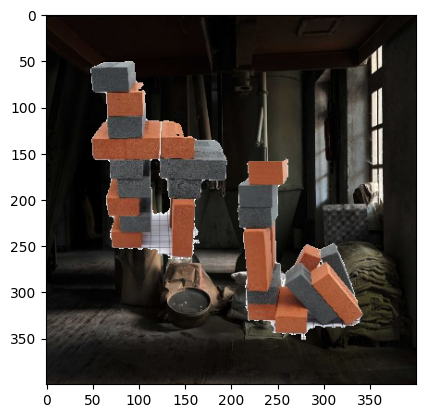

In [50]:
bg = cv2.imread('../data/crawed_img/indoor/abandoned-1835907__480.jpg')
bg = cv2.cvtColor(bg, cv2.COLOR_BGR2RGB)
for idx, row in data.iterrows():
    
    img_path1 = os.path.join('../data/train', f"{row.id1}.jpg")
    img1 = cv2.imread(img_path1)
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    
    img_path2 = os.path.join('../data/train', f"{row.id2}.jpg")
    img2 = cv2.imread(img_path2)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    thresh = 230
    
    random_h = randint(30, 80)
    random_w = randint(30, 80)
    
    h, w, c = img1.shape
    ###1
    resize_img1= cv2.resize(cv2.copyMakeBorder(img1,50,50,50,50,cv2.BORDER_CONSTANT,value=(255, 255, 255)), (h, w))
    move_img1 = imutils.translate(resize_img1, random_w, random_h)
    
    move_img1[np.where(move_img1 == 0)] = 255
    img_bin1 = np.array(move_img1[:, :, 0] < thresh, dtype=np.uint8) * 255
    img_blur1 = cv2.medianBlur(img_bin1, 5)
    img_filter1 = move_img1.copy()
    img_filter1[img_blur1 == 0] = 0
    
    retval, labels1, stats1, centroids1 = cv2.connectedComponentsWithStats(img_blur1)
    stats1 = np.array(stats1)
    stats1[0, -1] = 0
    label_idx1 = np.argmax(stats1[:, -1])
    img_mask1 = labels1 == label_idx1
    img_final1 = img_filter1.copy()
    img_final1[~img_mask1] = (0, 0, 0)
    
    #####2
    resize_img2= cv2.resize(cv2.copyMakeBorder(img2,50,50,50,50,cv2.BORDER_CONSTANT,value=(255, 255, 255)), (h, w))
    move_img2 = imutils.translate(resize_img2, -1*random_w, -1*random_h)
    
    move_img2[np.where(move_img2 == 0)] = 255
    img_bin2 = np.array(move_img2[:, :, 0] < thresh, dtype=np.uint8) * 255
    img_blur2 = cv2.medianBlur(img_bin2, 5)
    img_filter2 = move_img2.copy()
    img_filter2[img_blur2 == 0] = 0
    
    retval, labels2, stats2, centroids2 = cv2.connectedComponentsWithStats(img_blur2)
    stats2 = np.array(stats2)
    stats2[0, -1] = 0
    label_idx2 = np.argmax(stats2[:, -1])
    img_mask2 = labels2 == label_idx2
    img_final2 = img_filter2.copy()
    img_final2[~img_mask2] = (0, 0, 0)

    ###
    img_back = cv2.resize(bg, (h, w))
    img_back[img_mask1] = (0, 0, 0)
    img_back[img_mask2] = (0, 0, 0)
    
    img_final1 += img_final2
    img_final1 += img_back
    

    plt.imshow(img_final1)
    plt.show()
    
    break